# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 4/11/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 4/11/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,866,38928341,2.2
Albania,4259,2877800,148.0
Algeria,1680,43851043,3.8
Andorra,695,77265,899.5
Angola,1394,32866268,4.2
Antigua and Barbuda,70,97928,71.5
Argentina,223965,45195777,495.5
Armenia,12500,2963234,421.8
Australia,143,25459700,0.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Uruguay,47236,3473727,1359.8
San Marino,353,33938,1040.1
Andorra,695,77265,899.5
Hungary,86303,9660350,893.4
Bahrain,14617,1701583,859.0
Poland,323640,37846605,855.1
Estonia,10544,1326539,794.9
France,513400,65273512,786.5
Sweden,77383,10099270,766.2


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

4/7/21     2940279.0
4/8/21     2966789.0
4/9/21     2990724.0
4/10/21    3009452.0
4/11/21    3012158.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/29/21        NaN
3/30/21    23681.0
3/31/21    25014.0
4/1/21     22679.0
4/2/21     16033.0
4/3/21      3673.0
4/4/21     10300.0
4/5/21      5980.0
4/6/21      7593.0
4/7/21     30377.0
4/8/21     26510.0
4/9/21     23935.0
4/10/21    18728.0
4/11/21     2706.0
Name: Germany, dtype: float64

<AxesSubplot:>

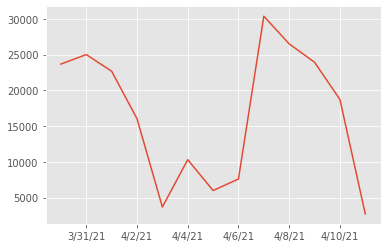

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

259.2489527677409